Amazon_review

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

2024-04-17 15:45:24.931612: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 15:45:24.931715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 15:45:25.030758: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data=pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [3]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
for i in data.columns:
    print(i,":",data[i].nunique())

Id : 568454
ProductId : 74258
UserId : 256059
ProfileName : 218415
HelpfulnessNumerator : 231
HelpfulnessDenominator : 234
Score : 5
Time : 3168
Summary : 295742
Text : 393579


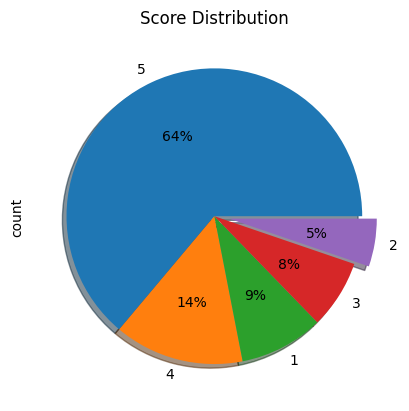

In [11]:
data['Score'].value_counts().plot(kind='pie',explode=(0,0,0,0,0.1),shadow=True,autopct="%.0f%%")
plt.title('Score Distribution')
plt.show()

Text Analysis 

In [14]:
import nltk
import string
stemmer = nltk.SnowballStemmer("english")

In [15]:
from nltk.corpus import stopwords 
stopwords=set(stopwords.words('english'))

In [16]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [17]:
text=data['Text'].values

In [18]:
text

array(['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
       'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
       'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
    

In [19]:
def clean(text):
    text=str(text).lower()
     # Remove text within square brackets
    text=re.sub('\[.*?\]','',text)
    # Remove URLs
    text=re.sub('https?://\S+|www\.\S+','',text)
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    #  Removing Punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Replace newline characters with spaces
    text = re.sub('\n', '', text)
    # Remove words containing digits
    text = re.sub('\w*\d\w*', '', text)
     # Tokenize the text and remove stopwords
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    # Stem the remaining words
    text = [stemmer.stem(word) for word in text.split(' ')]
    # Join the cleaned and stemmed words back into a string
    text=" ".join(text)
    return text


In [20]:
pos_neg_data = data[data['Score']!=3]
pos_neg_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [21]:
def partition(score):
    # Logic to categorize scores, replace this with your own logic
    if score > 3:
        return 'Positive'
    elif score < 3:
        return 'Negative'
    else:
        return 'Neutral'

# Extracting scores from pos_neg_data
score_updt = pos_neg_data['Score']

# Applying partition function to each score
scor_map = score_updt.apply(partition)

# Updating 'Score' column in pos_neg_data with the mapped values
pos_neg_data['Score'] = scor_map

In [22]:
pos_neg_data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
final_data= pos_neg_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'})

In [24]:
final = final_data[final_data['HelpfulnessNumerator']<=final_data['HelpfulnessDenominator']]

In [25]:
final

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,Positive,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,Negative,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,Positive,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,Positive,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [26]:
data_cleaned=pd.DataFrame()
data_cleaned['Text']=final["Text"].apply(clean)
data_cleaned['Score']=final['Score']
data_cleaned

,Text,Score
0,bought sever vital can dog food product found ...,Positive
1,product arriv label jumbo salt peanutsth peanu...,Negative
2,confect around centuri light pillowi citrus g...,Positive
3,look secret ingredi robitussin believ found g...,Negative
4,great taffi great price wide assort yummi taf...,Positive
...,...,...
568449,great sesam chickenthi good better restur eate...,Positive
568450,im disappoint flavor chocol note especi weak m...,Negative
568451,star small give one train session tri train ...,Positive
568452,best treat train reward dog good groom lower ...,Positive


In [29]:
corpus=''.join(i for i in data_cleaned['Text'])

In [30]:
text=data_cleaned['Text'].values
text

array(['bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better ',
       'product arriv label jumbo salt peanutsth peanut actual small size unsalt sure error vendor intend repres product jumbo',
       'confect around centuri  light pillowi citrus gelatin nut  case filbert cut tini squar liber coat powder sugar  tini mouth heaven  chewi flavor  high recommend yummi treat  familiar stori cs lewi lion witch wardrob  treat seduc edmund sell brother sister witch',
       ...,
       'star small give  one train session  tri train dog ceaser dog treat  made puppi hyper  compar ingredi know  littl star basic food ingredi without preserv food color  sweet potato flavor also make hand smell like dog food',
       'best treat train reward dog good groom  lower calori love doggi  sweet potato seem favorit wet nose treat',
       'satisfi product advertis use cereal raw vinegar general sweetner'],
      dt

In [31]:
# Step 1: Tokenization
tokens = []
for sentence in text:
    tokens.extend(sentence.split())

In [32]:
# Step 2: Frequency Count
word_count = {}
for token in tokens:
    if token in word_count:
        word_count[token] += 1
    else:
        word_count[token] = 1

In [33]:
word_count

{'bought': 32007,
 'sever': 14079,
 'vital': 334,
 'can': 13763,
 'dog': 48953,
 'food': 75135,
 'product': 116423,
 'found': 35216,
 'good': 124845,
 'qualiti': 21503,
 'look': 38089,
 'like': 170513,
 'stew': 1199,
 'process': 5647,
 'meat': 8727,
 'smell': 19903,
 'better': 42522,
 'labrador': 201,
 'finicki': 910,
 'appreci': 3021,
 'arriv': 14842,
 'label': 6794,
 'jumbo': 236,
 'salt': 17618,
 'peanutsth': 11,
 'peanut': 13756,
 'actual': 18807,
 'small': 19912,
 'size': 18639,
 'unsalt': 396,
 'sure': 19590,
 'error': 531,
 'vendor': 2146,
 'intend': 1325,
 'repres': 465,
 'confect': 223,
 'around': 14213,
 'centuri': 242,
 'light': 12777,
 'pillowi': 9,
 'citrus': 1121,
 'gelatin': 790,
 'nut': 10570,
 'case': 13175,
 'filbert': 34,
 'cut': 7450,
 'tini': 3708,
 'squar': 1801,
 'liber': 214,
 'coat': 5217,
 'powder': 11599,
 'sugar': 37104,
 'mouth': 7755,
 'heaven': 2068,
 'chewi': 5277,
 'flavor': 125750,
 'high': 32108,
 'recommend': 37737,
 'yummi': 6817,
 'treat': 31787,
 

In [34]:
# Step 3: Vocabulary Size
vocab_size = len(word_count)
print("Vocabulary size:", vocab_size)

Vocabulary size: 243504


In [35]:
# Tokenization: converting words or subwords into numerical tokens
max_features=5000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(text)
# tokenizes the input text data into sequences of integer indices
sequences = tokenizer.texts_to_sequences(text)

In [36]:
x=sequences

In [37]:
x= pad_sequences(x)

In [38]:
x

array([[   0,    0,    0, ...,  817,    6,   39],
       [   0,    0,    0, ..., 2585,    6, 3731],
       [   0,    0,    0, ...,  358, 1509, 1186],
       ...,
       [   0,    0,    0, ...,    1,   31,   15],
       [   0,    0,    0, ...,  894, 1251,   64],
       [   0,    0,    0, ...,  820,  639, 1728]], dtype=int32)

In [39]:
x.shape

(364171, 1232)

In [40]:
model = Sequential([
    tf.keras.layers.Embedding(vocab_size, output_dim=50),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [41]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [42]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
y=pd.get_dummies(data_cleaned['Score']).values
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)


In [44]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.0001,
                patience=20,
                verbose=1,
                mode='auto',
                baseline=None,
                restore_best_weights=False,
                )

In [45]:
model.fit(X_train, Y_train,epochs = 15,batch_size=100,verbose = 2)

Epoch 1/15
2440/2440 - 108s - 44ms/step - accuracy: 0.9138 - loss: 0.2177
Epoch 2/15
2440/2440 - 141s - 58ms/step - accuracy: 0.9294 - loss: 0.1789
Epoch 3/15
2440/2440 - 105s - 43ms/step - accuracy: 0.9368 - loss: 0.1602
Epoch 4/15
2440/2440 - 105s - 43ms/step - accuracy: 0.9427 - loss: 0.1461
Epoch 5/15
2440/2440 - 104s - 43ms/step - accuracy: 0.9482 - loss: 0.1329
Epoch 6/15
2440/2440 - 104s - 43ms/step - accuracy: 0.9534 - loss: 0.1204
Epoch 7/15
2440/2440 - 104s - 43ms/step - accuracy: 0.9584 - loss: 0.1091
Epoch 8/15
2440/2440 - 104s - 43ms/step - accuracy: 0.9629 - loss: 0.0981
Epoch 9/15
2440/2440 - 105s - 43ms/step - accuracy: 0.9670 - loss: 0.0877
Epoch 10/15
2440/2440 - 105s - 43ms/step - accuracy: 0.9716 - loss: 0.0773
Epoch 11/15
2440/2440 - 105s - 43ms/step - accuracy: 0.9741 - loss: 0.0705
Epoch 12/15
2440/2440 - 105s - 43ms/step - accuracy: 0.9776 - loss: 0.0610
Epoch 13/15
2440/2440 - 105s - 43ms/step - accuracy: 0.9810 - loss: 0.0531
Epoch 14/15
2440/2440 - 105s - 43m

In [47]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 54s 14ms/step - accuracy: 0.9135 - loss: 0.3503
Test Loss: 0.34910398721694946
Test Accuracy: 0.9144428372383118


In [48]:
# Sample review text
new_review = "This product is amazing! I love it."

In [49]:
# Tokenize the review text
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts([new_review])
sequences = tokenizer.texts_to_sequences([new_review])

# Pad sequences to have the same length as your model's input
max_sequence_length = 100  # Adjust this according to your model's input length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Now, padded_sequences contains the numerical representation of your review text

In [50]:
# Assuming your model is already trained and stored in 'model'
predictions = model.predict(padded_sequences)

# Assuming your model predicts probabilities for each class, you can get the predicted class
predicted_class = np.argmax(predictions)

# You can also get the probability score for each class
probability_scores = predictions[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [51]:
# Assuming you have a mapping of class indices to class labels
class_labels = {0: 'Negative', 1: 'Positive'}

# Get the predicted label
predicted_label = class_labels[predicted_class]

In [52]:
print("Predicted Label:", predicted_label)
print("Probability Scores:", probability_scores)

Predicted Label: Positive
Probability Scores: [0.02283924 0.9771608 ]
